### PSO (Particla Swarm Optimization) Algorithm

##### Import Statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##### Fitness Functions

- Sphere Function

In [2]:
def sphere( x):
	return np.sum( [ i ** 2 for i in x])

- Rastrigin Function

In [3]:
def rastr( x):
	return 10 * len( x) + np.sum( [ i ** 2 - 10 * np.cos( 2 * np.pi * i) for i in x])

##### PSO Function

In [4]:
# w: inertia weight
# c1: cognitive coefficient
# c2: global coefficient
# d: number of dimensions
# pn: number of particles
# domain: range of search space in every dimension
# n_iter: number of iterations
# fit: fitness function
def pso( w, c1, c2, d, pn, domain, n_iter, fit):
	
	# location of particles. initial seed within [ -domain, domain]
	p = ( 2 * domain * np.random.rand( pn, d)) - domain
	
	# initial velocity
	v = np.zeros( ( pn, d))

	# best location of particle initiated with p ( initial location)
	pbest = np.copy( p)

	# value of fit function for each particle
	f = np.array( [ fit( i) for i in p])

	# best value of fit function for each particle
	# initiated with f ( initial value of fit function for each particle)
	fpbest = np.copy( f)

	# best value of fit function among all particles
	# and its corresponding location
	fgbest, gbest = f.min(), p[ f.argmin()]

	# variable for recording history of fgbest (best value of fit function)
	history = np.zeros( n_iter)

	# iterate n_iter time
	for i in range( n_iter):
		
		# recording best value of fit function
		history[ i] = fgbest

		# for each particle
		for j in range( pn):

			# for each dimension
			for k in range( d):
				# generate two random numbers in range [ -1, 1]
				r1, r2 = np.random.rand( 2)
				
				# calculate velocity of particle
				v[ j][ k] = ( w * v[ j][ k]) + ( r1 * c1 * ( pbest[ j][ k] - p[ j][ k])) + ( r2 * c2 * ( gbest[ k] - p[ j][ k]))

				# update location of particle
				p[ j][ k] = p[ j][ k] + v[ j][ k]

		# for each particle
		for j in range( pn):
			# calculate value of fit function for new location
			f[ j] = fit( p[ j])

			# if new value of particle is better than the best value of it
			if f[ j] < fpbest[ j]:
				# update best value of particle
				fpbest[ j] = f[ j]
				# update best location of particle
				pbest[ j] = p[ j]
		
		# if there is better value than best value
		# if f.min() < fgbest:
			# update best value and its corresponding location
		fgbest, gbest = f.min(), p[ f.argmin()]
		
	return history, fgbest, gbest

##### Driver

Best Value: 0.0031695606106618545
Best Params: [-0.00987325 -0.03356041  0.01133183 -0.00435192 -0.0167051   0.01222054
  0.02845192 -0.00518593  0.01357271 -0.01869231]


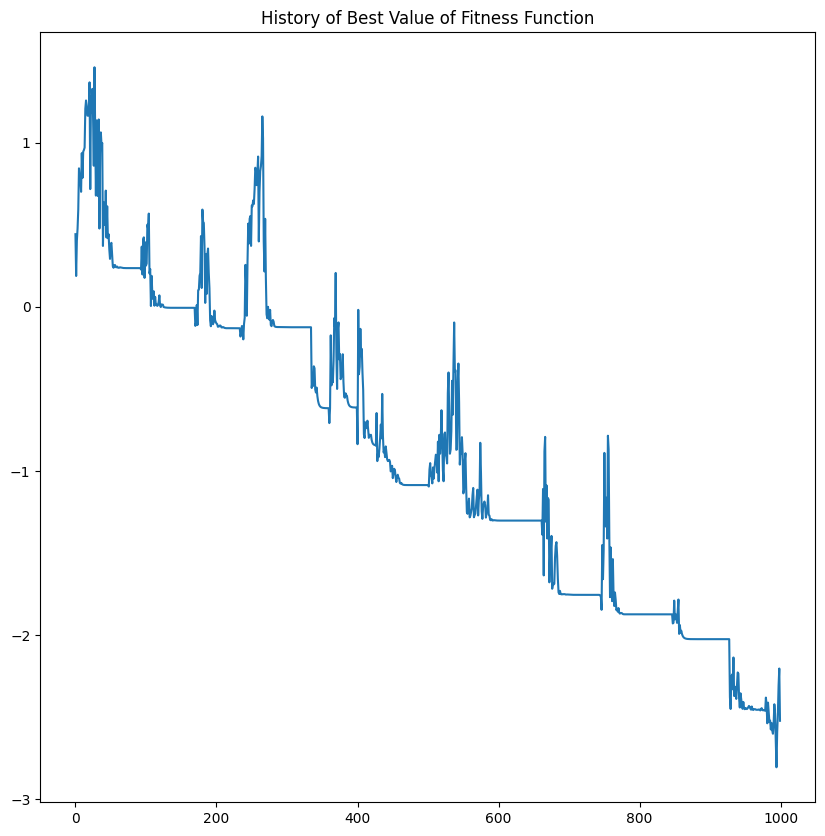

In [7]:
h, f, p = pso(
	w=0.7,
	c1=2,
	c2=2,
	d=10,
	pn=10,
	domain=1,
	n_iter=1000,
	fit=sphere
)

print( f"Best Value: { f}")
print( f"Best Params: { p}")

plt.figure( figsize=( 10, 10))
plt.title( "History of Best Value of Fitness Function")
plt.plot( np.log10( h))
plt.show()